In [4]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [5]:
# load in clean and tidy data and create workfile
df = pd.read_csv("health_ineq_online_table_1.csv")

In [6]:
df

,gnd,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,F,1,7098335,4.327821e+02,3.833254e+02,78.52628,78.78384,0.052538,0.062370
1,F,2,7120033,1.919116e+03,1.681780e+03,80.29138,80.46241,0.056187,0.064146
2,F,3,7131115,3.718216e+03,3.344087e+03,81.04365,81.16810,0.056927,0.065437
3,F,4,7135812,5.466639e+03,5.051834e+03,81.43418,81.53068,0.058089,0.065256
4,F,5,7140055,7.089429e+03,6.671779e+03,81.54852,81.62885,0.058225,0.064854
...,...,...,...,...,...,...,...,...,...
195,M,96,6953071,2.570520e+05,2.249077e+05,86.21402,86.32386,0.075620,0.084606
196,M,97,6954378,2.972074e+05,2.557433e+05,86.40608,86.52405,0.077477,0.084408
197,M,98,6956188,3.654243e+05,3.064940e+05,86.64326,86.77003,0.078087,0.085943
198,M,99,6956929,5.116917e+05,4.125774e+05,86.77115,86.91302,0.074041,0.080363


In [7]:
#Summary Statistics
df.describe()

,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,50.500000,7.041436e+06,9.771184e+04,8.801818e+04,83.046589,83.092706,0.069580,0.074298
std,28.938507,1.463053e+05,2.015357e+05,1.549355e+05,3.373378,3.330028,0.009055,0.012146
min,1.000000,6.767752e+06,3.562361e+02,2.841466e+02,72.374810,72.742780,0.042176,0.052039
25%,25.750000,6.910875e+06,3.072709e+04,2.867067e+04,81.313312,81.415612,0.063896,0.066256
50%,50.500000,7.028468e+06,6.047663e+04,5.771530e+04,83.510525,83.643190,0.071840,0.073425
75%,75.250000,7.186135e+06,1.034540e+05,9.973633e+04,85.550840,85.569468,0.076347,0.082272
max,100.000000,7.217115e+06,1.982300e+06,1.532601e+06,88.913250,88.874840,0.083568,0.103408


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gnd            200 non-null    object 
 1   pctile         200 non-null    int64  
 2   count          200 non-null    int64  
 3   hh_inc         200 non-null    float64
 4   hh_inc_age40   200 non-null    float64
 5   le_agg         200 non-null    float64
 6   le_raceadj     200 non-null    float64
 7   sd_le_agg      200 non-null    float64
 8   sd_le_raceadj  200 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 14.2+ KB


In [ ]:
#there are no missing variables, so no need to drop or impute

In [8]:
df_females = df[df["gnd"]=="F"]

In [9]:
df_females

,gnd,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,F,1,7098335,4.327821e+02,3.833254e+02,78.52628,78.78384,0.052538,0.062370
1,F,2,7120033,1.919116e+03,1.681780e+03,80.29138,80.46241,0.056187,0.064146
2,F,3,7131115,3.718216e+03,3.344087e+03,81.04365,81.16810,0.056927,0.065437
3,F,4,7135812,5.466639e+03,5.051834e+03,81.43418,81.53068,0.058089,0.065256
4,F,5,7140055,7.089429e+03,6.671779e+03,81.54852,81.62885,0.058225,0.064854
...,...,...,...,...,...,...,...,...,...
95,F,96,7214680,2.423461e+05,2.334126e+05,88.51549,88.40836,0.079773,0.092570
96,F,97,7215130,2.791764e+05,2.665393e+05,88.62096,88.53288,0.077473,0.093916
97,F,98,7214824,3.418724e+05,3.216564e+05,88.53431,88.46419,0.081413,0.098390
98,F,99,7215914,4.774206e+05,4.378373e+05,88.66727,88.61108,0.079439,0.094965


In [10]:
print(df_females["le_agg"].describe())

count    100.000000
mean      84.926896
std        2.173072
min       78.526280
25%       83.320400
50%       84.968105
75%       86.487732
max       88.913250
Name: le_agg, dtype: float64


In [11]:
print(df_females["hh_inc"].describe())

count    1.000000e+02
mean     9.470453e+04
std      1.986756e+05
min      4.327821e+02
25%      2.938674e+04
50%      5.768435e+04
75%      9.987812e+04
max      1.923274e+06
Name: hh_inc, dtype: float64


In [ ]:
#given this we can see that in America, the mean life expectancy for females is 84.9 years 
#and the average income for females, specifically,is 94,704.53 

In [12]:
df_males = df[df["gnd"]=="M"]

In [13]:
df_males

,gnd,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
100,M,1,6767752,3.562361e+02,2.841466e+02,72.37481,72.74278,0.042176,0.057908
101,M,2,6796273,1.602847e+03,1.198620e+03,74.22428,74.49557,0.045743,0.056516
102,M,3,6810846,3.222197e+03,2.463722e+03,75.25354,75.45113,0.047029,0.055741
103,M,4,6819310,4.904683e+03,3.878391e+03,75.69355,75.83810,0.048603,0.055750
104,M,5,6823613,6.551418e+03,5.331466e+03,75.92894,76.03336,0.051366,0.056555
...,...,...,...,...,...,...,...,...,...
195,M,96,6953071,2.570520e+05,2.249077e+05,86.21402,86.32386,0.075620,0.084606
196,M,97,6954378,2.972074e+05,2.557433e+05,86.40608,86.52405,0.077477,0.084408
197,M,98,6956188,3.654243e+05,3.064940e+05,86.64326,86.77003,0.078087,0.085943
198,M,99,6956929,5.116917e+05,4.125774e+05,86.77115,86.91302,0.074041,0.080363


In [14]:
print(df_males["le_agg"].describe())

count    100.000000
mean      81.166282
std        3.318061
min       72.374810
25%       78.494335
50%       81.591050
75%       83.711400
max       87.192720
Name: le_agg, dtype: float64


In [15]:
print(df_males["hh_inc"].describe())

count    1.000000e+02
mean     1.007191e+05
std      2.053126e+05
min      3.562361e+02
25%      3.274981e+04
50%      6.326254e+04
75%      1.061308e+05
max      1.982300e+06
Name: hh_inc, dtype: float64


In [ ]:
#given this we can see that in America, the mean life expectancy for males is 81.1 years 
#and the average income for males, specifically,is 100,719.1
#as of now the data does not support that higher income leads to longevity 
#and sugguests that gender plays an important influence in life expectancy

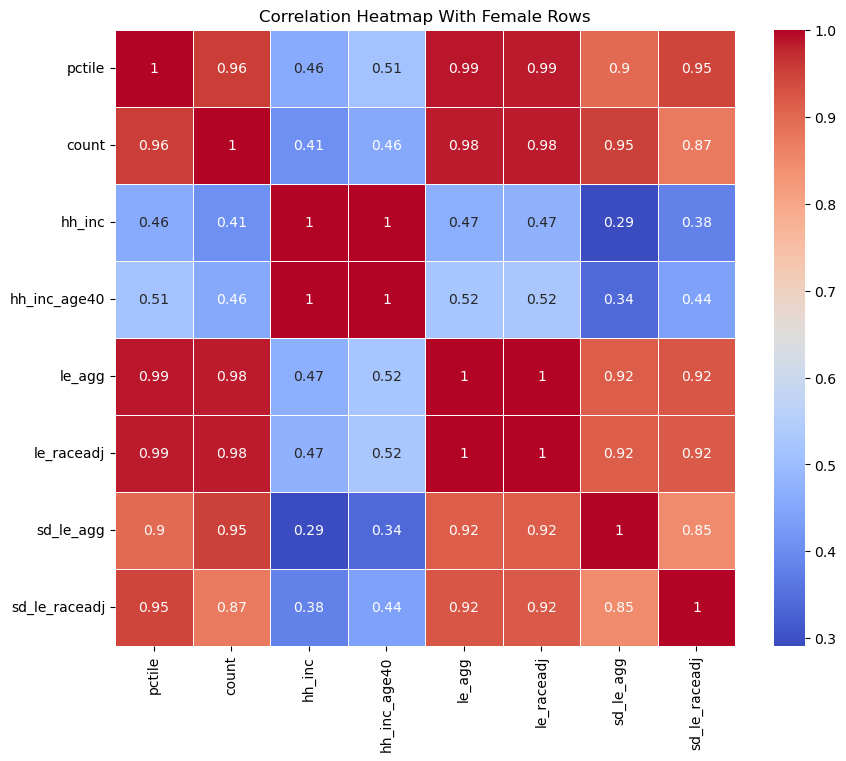

In [18]:
corr_matrix = df_females.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap With Female Rows')
plt.show()

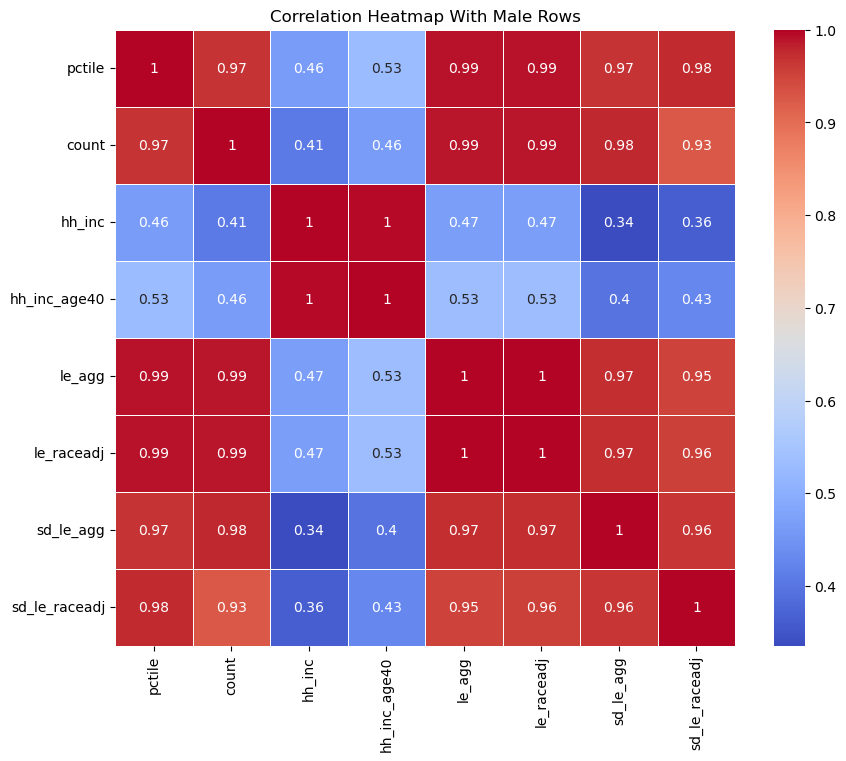

In [19]:
corr_matrix = df_males.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap With Male Rows')
plt.show()

In [20]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['pctile', 'count', 'hh_inc', 'hh_inc_age40', 'le_agg', 'le_raceadj', 'sd_le_agg', 'sd_le_raceadj']


In [21]:
# view the numerical variables
df[numerical].head()

,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,1,7098335,432.7821,383.3254,78.52628,78.78384,0.052538,0.062370
1,2,7120033,1919.1160,1681.7800,80.29138,80.46241,0.056187,0.064146
2,3,7131115,3718.2160,3344.0870,81.04365,81.16810,0.056927,0.065437
3,4,7135812,5466.6390,5051.8340,81.43418,81.53068,0.058089,0.065256
4,5,7140055,7089.4290,6671.7790,81.54852,81.62885,0.058225,0.064854


In [22]:
df_num = df[numerical]
df_num

,pctile,count,hh_inc,hh_inc_age40,le_agg,le_raceadj,sd_le_agg,sd_le_raceadj
0,1,7098335,4.327821e+02,3.833254e+02,78.52628,78.78384,0.052538,0.062370
1,2,7120033,1.919116e+03,1.681780e+03,80.29138,80.46241,0.056187,0.064146
2,3,7131115,3.718216e+03,3.344087e+03,81.04365,81.16810,0.056927,0.065437
3,4,7135812,5.466639e+03,5.051834e+03,81.43418,81.53068,0.058089,0.065256
4,5,7140055,7.089429e+03,6.671779e+03,81.54852,81.62885,0.058225,0.064854
...,...,...,...,...,...,...,...,...
195,96,6953071,2.570520e+05,2.249077e+05,86.21402,86.32386,0.075620,0.084606
196,97,6954378,2.972074e+05,2.557433e+05,86.40608,86.52405,0.077477,0.084408
197,98,6956188,3.654243e+05,3.064940e+05,86.64326,86.77003,0.078087,0.085943
198,99,6956929,5.116917e+05,4.125774e+05,86.77115,86.91302,0.074041,0.080363


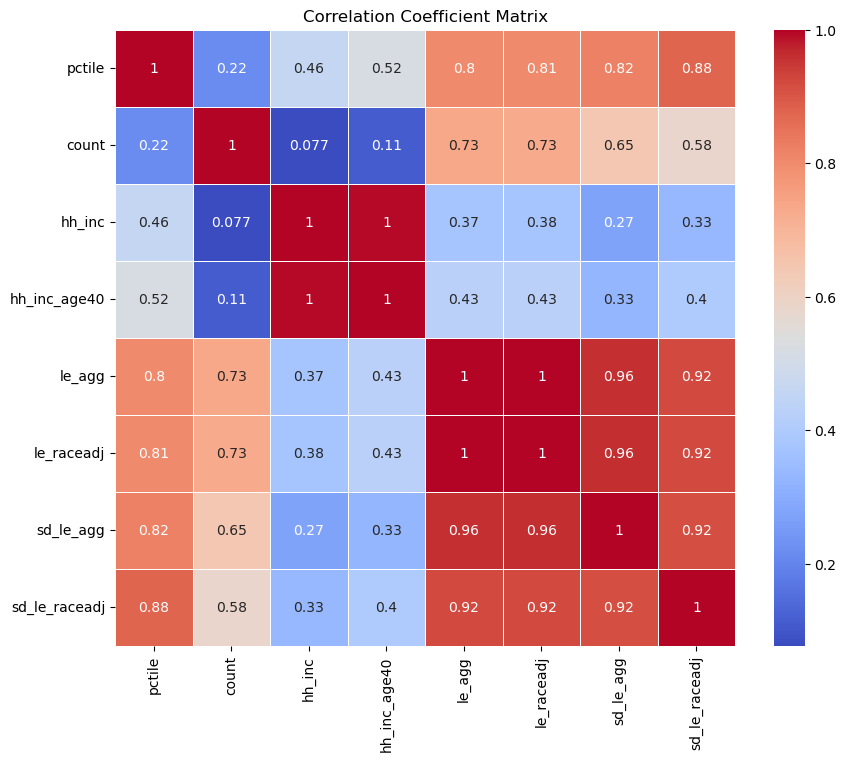

In [23]:
# Correlation in numerial data
# Assuming df_num is your DataFrame
correlation_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

In [ ]:
#From these matrix, it is evident that hh_inc_age40 and hh_inc are identical. 
#Thus, only one of these columns should be kept.
#hh_inc_age40 will be dropped
#le_raceadj and le_agg also have a correlation of 1, reflecting that they are identical.
#In addition, there is also high correlation between sd_le_agg & le_agg and sd_le_raceadj & le_agg
#Due to the high correlation, only le_agg will be kept


In [25]:
# Because of high correlations some numeric variables we will remove them from our data

#Drop one distinct numeric variables
columns_to_remove = ['hh_inc_age40', 'le_raceadj', 'sd_le_agg', 'sd_le_raceadj']
df_num_dropped = df_num.drop(columns=columns_to_remove)
df_num_dropped

,pctile,count,hh_inc,le_agg
0,1,7098335,4.327821e+02,78.52628
1,2,7120033,1.919116e+03,80.29138
2,3,7131115,3.718216e+03,81.04365
3,4,7135812,5.466639e+03,81.43418
4,5,7140055,7.089429e+03,81.54852
...,...,...,...,...
195,96,6953071,2.570520e+05,86.21402
196,97,6954378,2.972074e+05,86.40608
197,98,6956188,3.654243e+05,86.64326
198,99,6956929,5.116917e+05,86.77115


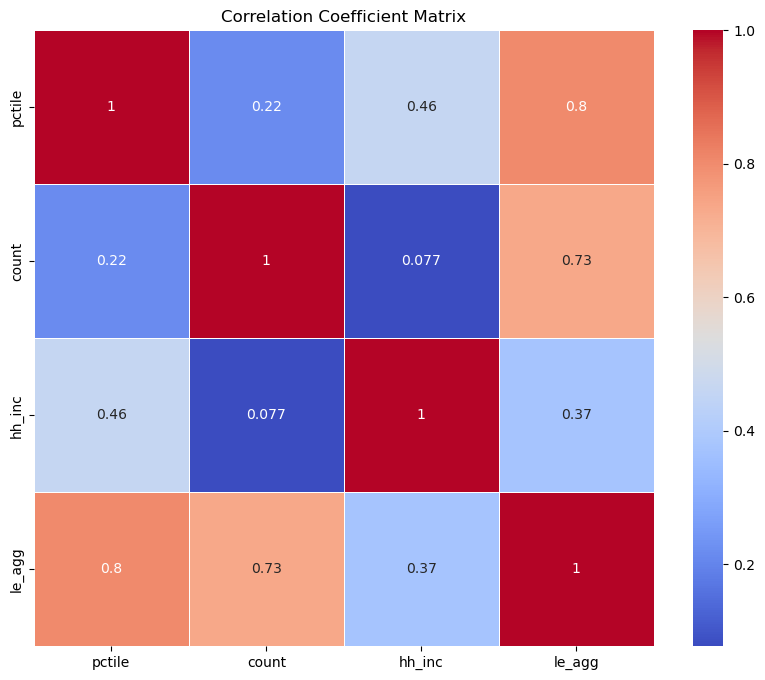

In [26]:
# Correlation in numerial data for df_num_dropped data
# Assuming df_num is your DataFrame
correlation_matrix = df_num_dropped.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

In [ ]:
#Next it is important to identify any outliers

In [27]:
df_num_dropped.columns

Index(['pctile', 'count', 'hh_inc', 'le_agg'], dtype='object')

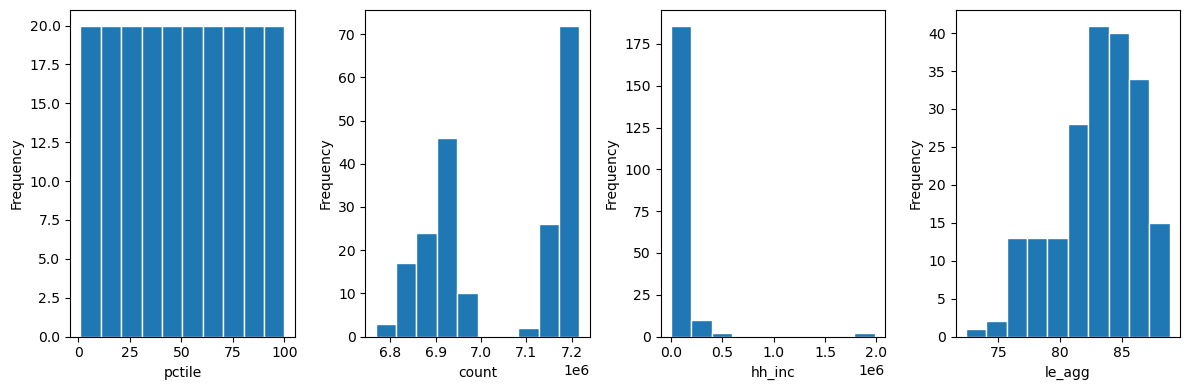

In [28]:
# Define the numerical variables
numerical_vars = ['pctile', 'count', 'hh_inc', 'le_agg']

# Create subplots for histograms
fig, axs = plt.subplots(1, len(numerical_vars), figsize=(12, 4))

# Plot histograms for each numerical variable
for i, var in enumerate(numerical_vars):
    axs[i].hist(df_num_dropped[var], edgecolor='white', align='mid')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#At first glance, there seems to be an outlier for hh_inc at 2.0

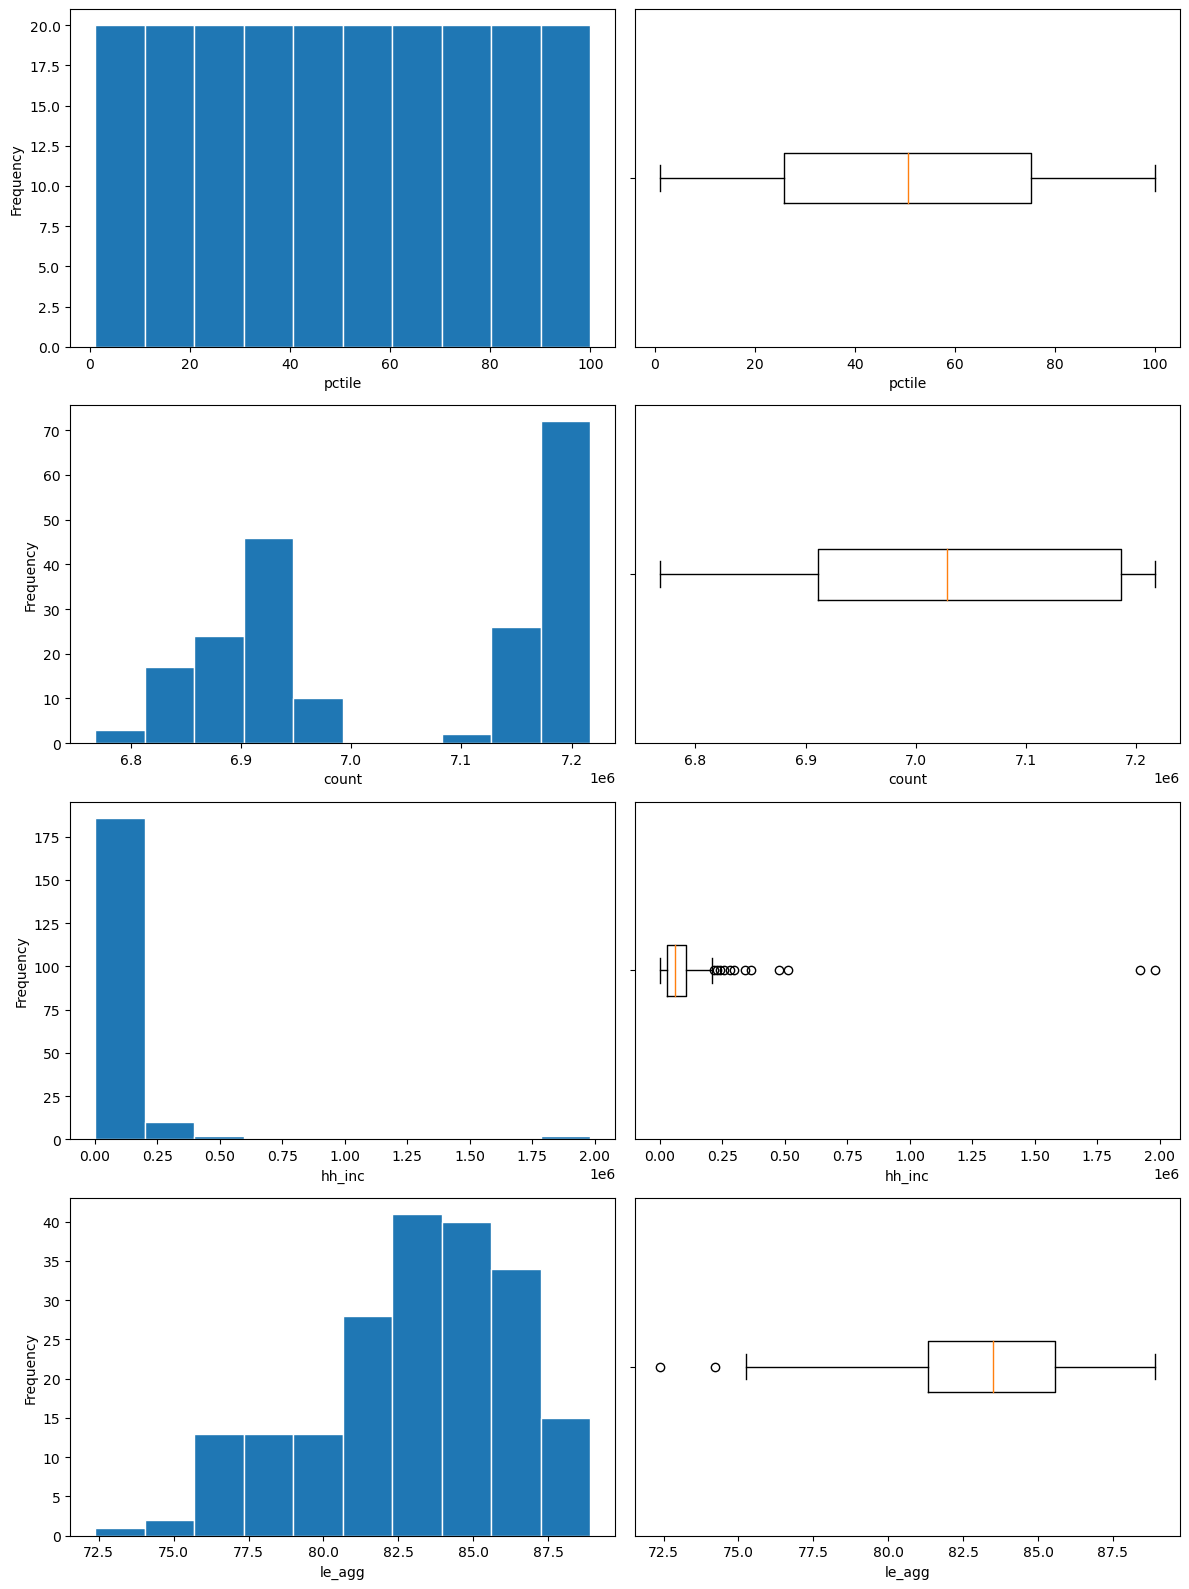

In [29]:
# Define the numerical variables
numerical_vars = ['pctile', 'count', 'hh_inc', 'le_agg']

# Create subplots for histograms and box plots
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(12, 4 * len(numerical_vars)))

# Plot histograms and box plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Plot histogram
    axs[i, 0].hist(df_num_dropped[var], edgecolor='white', align='mid')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')

    # Plot box plot
    axs[i, 1].boxplot(df_num_dropped[var], vert=False)
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_yticklabels([])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#There seems to be two outliers for hh_inc
#So apply Winsorization to reduce outliers

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Define the numerical variables
numerical_vars = ['pctile', 'count', 'hh_inc', 'le_agg']

# Apply Winsorization to reduce outliers
winsorized_df = df_num_dropped.copy()
for var in numerical_vars:
    q_low = df_num_dropped[var].quantile(0.01)
    q_high = df_num_dropped[var].quantile(0.99)
    winsorized_df[var] = df_num_dropped[var].clip(q_low, q_high)

# Apply scaling to the winsorized DataFrame
scaler = MinMaxScaler()  # or StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(winsorized_df[numerical_vars]), columns=numerical_vars)

# Display the scaled DataFrame
print(scaled_df)

       pctile     count    hh_inc    le_agg
0    0.000000  0.711197  0.000000  0.245402
1    0.000103  0.764847  0.000626  0.377341
2    0.010410  0.792248  0.004058  0.433572
3    0.020717  0.803861  0.007393  0.462764
4    0.031025  0.814352  0.010489  0.471310
..        ...       ...       ...       ...
195  0.968975  0.352022  0.487319  0.820050
196  0.979283  0.355253  0.563920  0.834406
197  0.989590  0.359729  0.694051  0.852135
198  0.999897  0.361561  0.973073  0.861695
199  1.000000  0.365692  1.000000  0.893206

[200 rows x 4 columns]


In [31]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pctile  200 non-null    float64
 1   count   200 non-null    float64
 2   hh_inc  200 non-null    float64
 3   le_agg  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


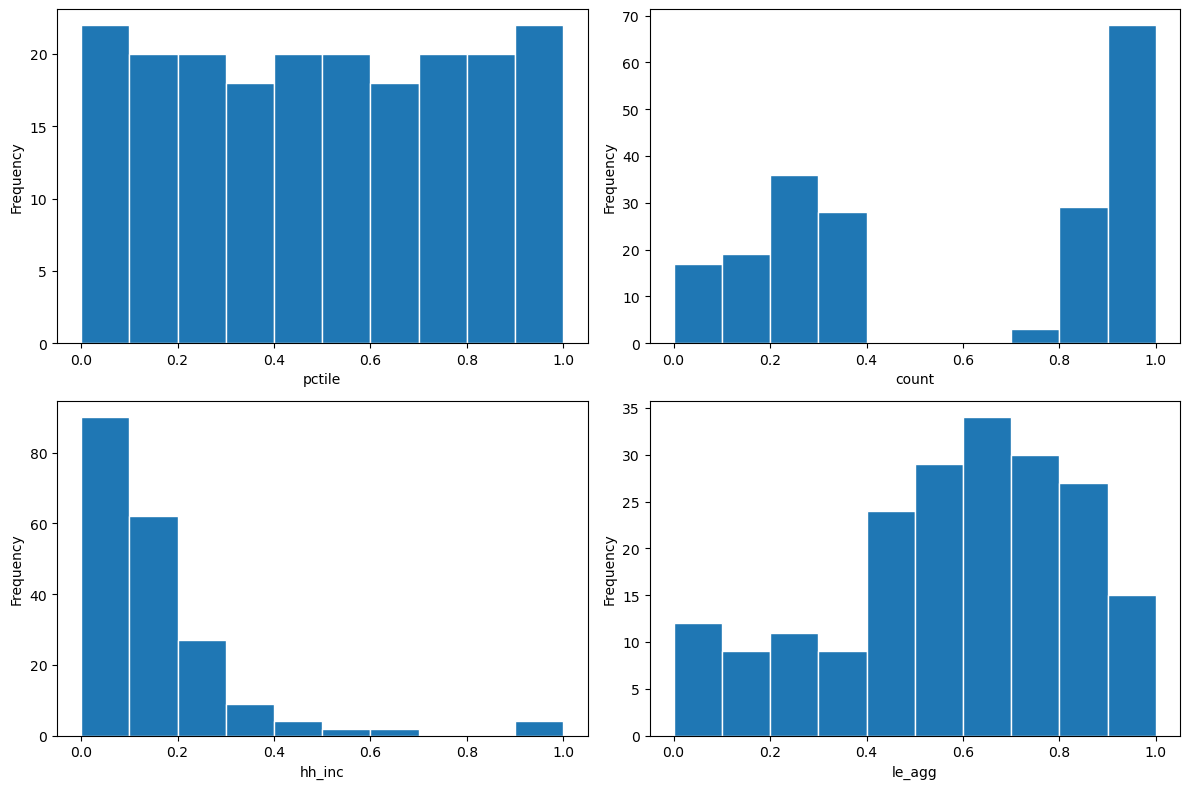

In [36]:
# Create subplots for histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# Plot histograms for each variable
for i, var in enumerate(numerical_vars):
    axs[i].hist(scaled_df[var], bins=10, edgecolor='white', align='mid')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

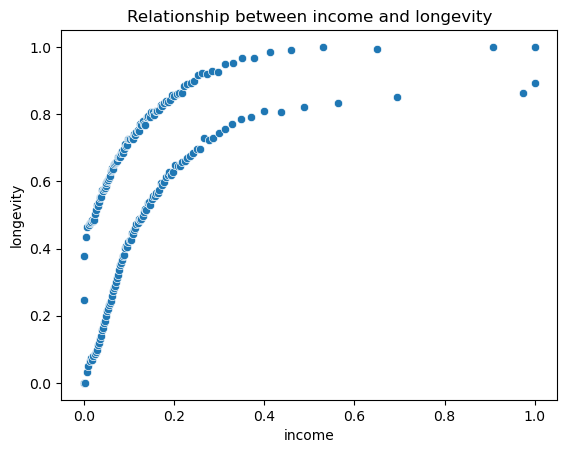

In [38]:
# Plotting the relationship between price and distance
sns.scatterplot(data=scaled_df, x='hh_inc', y='le_agg')
plt.xlabel('income')
plt.ylabel('longevity')
plt.title('Relationship between income and longevity')
plt.show()

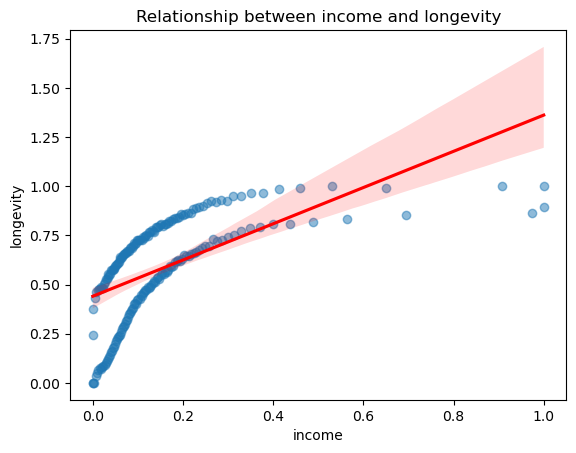

In [42]:
# Plotting the relationship between price and distance
sns.regplot(data=scaled_df, x='hh_inc', y='le_agg', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('income')
plt.ylabel('longevity')
plt.title('Relationship between income and longevity')
plt.show()

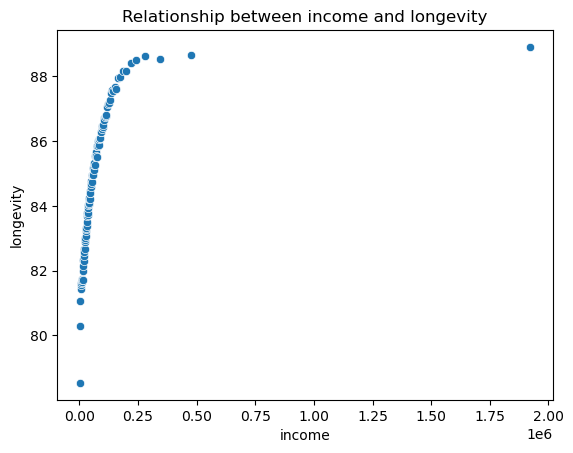

In [40]:
# Plotting the relationship between price and distance
sns.scatterplot(data=df_females, x='hh_inc', y='le_agg')
plt.xlabel('income')
plt.ylabel('longevity')
plt.title('Relationship between income and longevity')
plt.show()

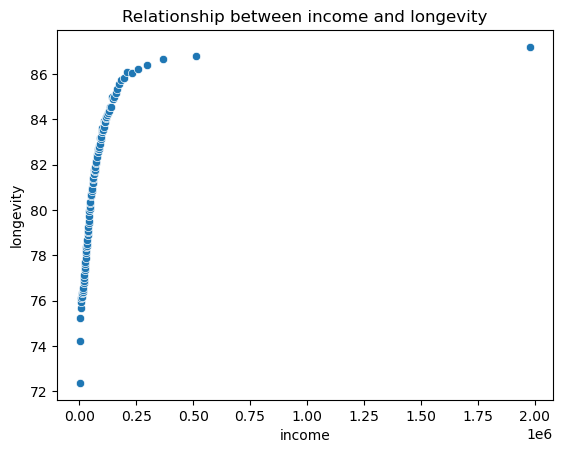

In [41]:
# Plotting the relationship between price and distance
sns.scatterplot(data=df_males, x='hh_inc', y='le_agg')
plt.xlabel('income')
plt.ylabel('longevity')
plt.title('Relationship between income and longevity')
plt.show()

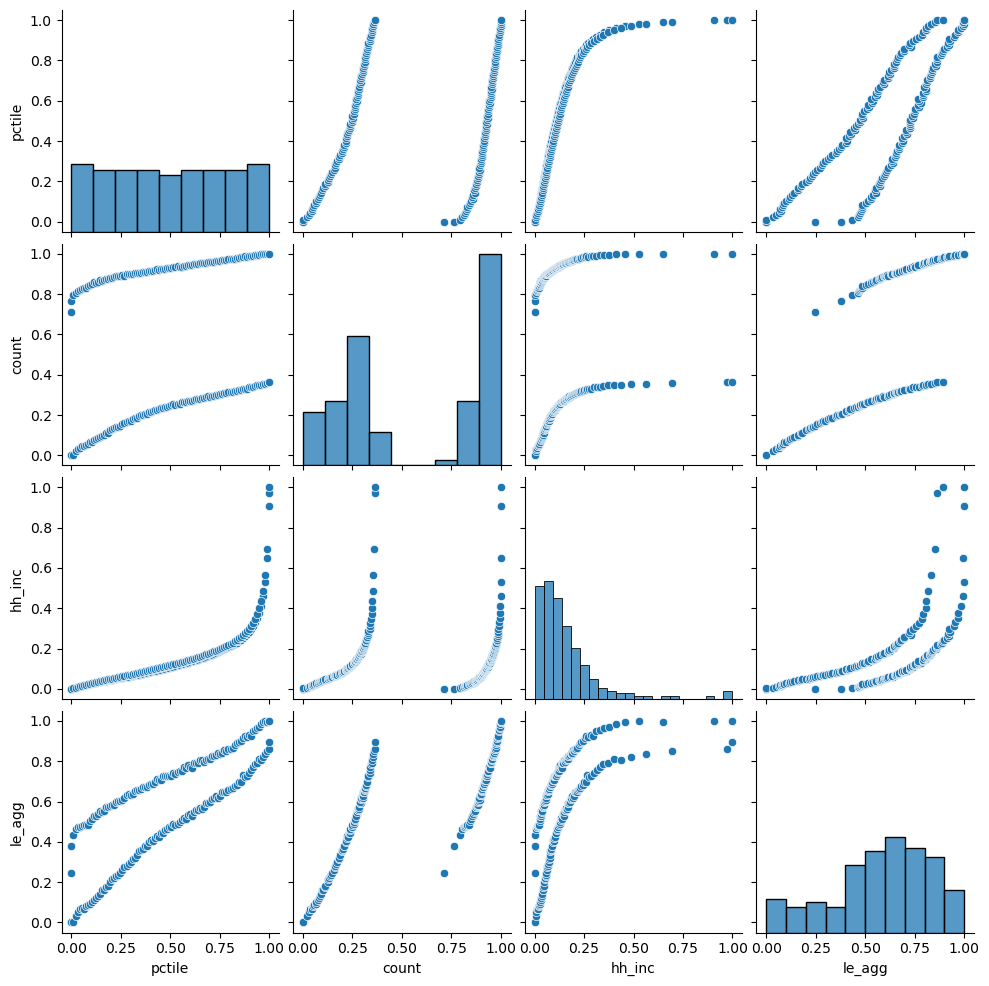

In [43]:
sns.pairplot(scaled_df)

In [ ]:
#the scatter plots suggests a positive correlation between income and longevity